In [1]:
%matplotlib inline

In [2]:
import numpy as np
from pathlib import Path
import h5py
from tqdm import tqdm
from itertools import product
import multiprocessing as mp

In [3]:
import matplotlib.pyplot as plt

In [4]:
from robust_motifs.data import (save_count_graph_from_matrix, matrix_shuffle,
                                load_bbp_matrix_format, adjust_bidirectional_edges,
                               load_sparse_matrix_from_pkl)
from robust_motifs.custom_mp import prepare_shared_memory
from robust_motifs.counting import get_n_extended_simplices

In [7]:
path = Path("data/data_daniela/O1_matrix/matrix_O1_col2.npy")
original_matrix = load_bbp_matrix_format(path)

pathway_shuffled_matrix = load_bbp_matrix_format(path, shuffle_type="pathway")

shuffled_matrix = load_bbp_matrix_format(path, shuffle_type="all")

100%|██████████| 55/55 [08:11<00:00,  8.93s/it]


In [11]:
original_matrix.multiply(original_matrix.T)

<31346x31346 sparse matrix of type '<class 'numpy.bool_'>'
	with 189038 stored elements in Compressed Sparse Row format>

In [12]:
bid_adjusted_matrix = adjust_bidirectional_edges(shuffled_matrix, int(189038/2))

Adding bidirectional edges...: 100%|██████████| 63699/63699 [00:00<00:00, 155768.00it/s]


In [13]:
bid_adjusted_matrix.multiply(bid_adjusted_matrix.T)

<31346x31346 sparse matrix of type '<class 'numpy.bool_'>'
	with 189038 stored elements in Compressed Sparse Row format>

### Processing

In [17]:
overall_results = [{}, {}, {}, {}]

### Column

In [18]:
save_path = Path("data/models/column/column.flag")
save_path.parent.mkdir(exist_ok=True, parents=True)
flag_path, pkl_path, count_path =save_count_graph_from_matrix(save_path, original_matrix)

100%|██████████| 31346/31346 [00:00<00:00, 3138793.74it/s]
7803528it [00:11, 652889.15it/s]


In [19]:
pool = mp.Pool()

In [20]:

complex_file = h5py.File(count_path, 'r')
matrix = load_sparse_matrix_from_pkl(pkl_path)
bid_matrix = matrix.multiply(matrix.T)
arrays, links = prepare_shared_memory(matrix, "full")
bid_arrays, bid_links = prepare_shared_memory(bid_matrix, "bid")
for _ in range(10):
    result_dictionary = {}
    aux_dictionary = {}
######## iteration #####
    for dimension in tqdm(range(1, 7)):
        try:
            ####### step 1: compiling the dictionary ######
            random_selection = np.random.choice(complex_file["Cells_" + str(dimension)].shape[0],
                                                min(10000,complex_file["Cells_" + str(dimension)].shape[0]),
                                                replace = False)
            random_selection.sort()
            simplex_iterator = iter(complex_file["Cells_" + str(dimension)][random_selection])
            ###### step 2: getting bidirectional targets ######
             # fictitious product to satisfy imap reqs of a single arugment.
            mp_iterator = product(simplex_iterator, [arrays], [bid_arrays])
            results = pool.imap(get_n_extended_simplices, mp_iterator)
            ###### step 3: counting extended simplices ######
            for elem in results:
                result_dictionary[dimension] = result_dictionary.get(dimension, 0) + elem[0]
        except KeyError: # If there are no simplices in h5 file..
                result_dictionary[dimension] = 0
        try:
            aux_dictionary[dimension] = len(complex_file["Cells_" + str(dimension)])
        except KeyError: # If there are no simplices in h5 file...
            aux_dictionary[dimension] = 0
        
        overall_results[0][dimension] = overall_results[0].get(dimension, []) + [result_dictionary[dimension]]
    print("Extended simplices for 10000 simplices per dimension")
    print(result_dictionary)
    print("Total simplices per dimension")
    print(aux_dictionary)
    # free shared memory
for link in links:
    link.unlink()
for link in bid_links:
    link.unlink()

  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 86175, 2: 105492, 3: 117736, 4: 126549, 5: 133820, 6: 11343}
Total simplices per dimension
{1: 7803528, 2: 76936601, 3: 65939554, 4: 7637507, 5: 163019, 6: 808}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 85869, 2: 104483, 3: 116523, 4: 126656, 5: 134314, 6: 11343}
Total simplices per dimension
{1: 7803528, 2: 76936601, 3: 65939554, 4: 7637507, 5: 163019, 6: 808}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 85606, 2: 103982, 3: 116463, 4: 125150, 5: 130223, 6: 11343}
Total simplices per dimension
{1: 7803528, 2: 76936601, 3: 65939554, 4: 7637507, 5: 163019, 6: 808}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 86274, 2: 103985, 3: 116746, 4: 124838, 5: 133069, 6: 11343}
Total simplices per dimension
{1: 7803528, 2: 76936601, 3: 65939554, 4: 7637507, 5: 163019, 6: 808}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 84716, 2: 104679, 3: 117310, 4: 126288, 5: 132575, 6: 11343}
Total simplices per dimension
{1: 7803528, 2: 76936601, 3: 65939554, 4: 7637507, 5: 163019, 6: 808}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 85954, 2: 103620, 3: 117779, 4: 125427, 5: 134585, 6: 11343}
Total simplices per dimension
{1: 7803528, 2: 76936601, 3: 65939554, 4: 7637507, 5: 163019, 6: 808}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 85904, 2: 104691, 3: 117184, 4: 127009, 5: 132693, 6: 11343}
Total simplices per dimension
{1: 7803528, 2: 76936601, 3: 65939554, 4: 7637507, 5: 163019, 6: 808}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 84413, 2: 102459, 3: 116270, 4: 125993, 5: 131056, 6: 11343}
Total simplices per dimension
{1: 7803528, 2: 76936601, 3: 65939554, 4: 7637507, 5: 163019, 6: 808}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 85823, 2: 104954, 3: 117244, 4: 125119, 5: 132841, 6: 11343}
Total simplices per dimension
{1: 7803528, 2: 76936601, 3: 65939554, 4: 7637507, 5: 163019, 6: 808}


100%|██████████| 6/6 [01:41<00:00, 16.89s/it]

Extended simplices for 10000 simplices per dimension
{1: 86638, 2: 105886, 3: 116454, 4: 126259, 5: 132297, 6: 11343}
Total simplices per dimension
{1: 7803528, 2: 76936601, 3: 65939554, 4: 7637507, 5: 163019, 6: 808}


<BarContainer object of 6 artists>

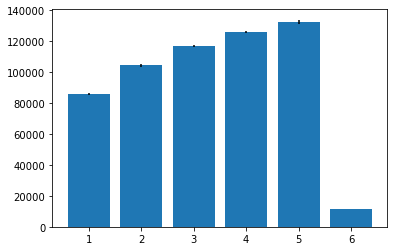

In [21]:
a = []
b = []
for elem in overall_results[0].values():
    a.append(np.mean(elem))
    b.append(np.std(elem))
plt.bar(range(1,7), a, yerr=b)

### Pathway shuffled

In [22]:
save_path = Path("data/models/pshuffled/pshuffled.flag")
save_path.parent.mkdir(exist_ok=True, parents=True)
flag_path, pkl_path, count_path =save_count_graph_from_matrix(save_path, pathway_shuffled_matrix)

100%|██████████| 31346/31346 [00:00<00:00, 3149772.48it/s]
7803528it [00:11, 678937.56it/s]


In [23]:
pool = mp.Pool()

In [24]:
complex_file = h5py.File(count_path, 'r')
matrix = load_sparse_matrix_from_pkl(pkl_path)
bid_matrix = matrix.multiply(matrix.T)
arrays, links = prepare_shared_memory(matrix, "full")
bid_arrays, bid_links = prepare_shared_memory(bid_matrix, "bid")
for _ in range(10):
    result_dictionary = {}
    aux_dictionary = {}
######## iteration #####
    for dimension in tqdm(range(1, 7)):
        try:
            ####### step 1: compiling the dictionary ######
            random_selection = np.random.choice(complex_file["Cells_" + str(dimension)].shape[0],
                                                min(10000,complex_file["Cells_" + str(dimension)].shape[0]),
                                                replace = False)
            random_selection.sort()
            simplex_iterator = iter(complex_file["Cells_" + str(dimension)][random_selection])
            ###### step 2: getting bidirectional targets ######
             # fictitious product to satisfy imap reqs of a single arugment.
            mp_iterator = product(simplex_iterator, [arrays], [bid_arrays])
            results = pool.imap(get_n_extended_simplices, mp_iterator)
            ###### step 3: counting extended simplices ######
            for elem in results:
                result_dictionary[dimension] = result_dictionary.get(dimension, 0) + elem[0]
        except KeyError: # If there are no simplices in h5 file..
                result_dictionary[dimension] = 0
        try:
            aux_dictionary[dimension] = len(complex_file["Cells_" + str(dimension)])
        except KeyError: # If there are no simplices in h5 file...
            aux_dictionary[dimension] = 0
        
        overall_results[1][dimension] = overall_results[1].get(dimension, []) + [result_dictionary[dimension]]
    print("Extended simplices for 10000 simplices per dimension")
    print(result_dictionary)
    print("Total simplices per dimension")
    print(aux_dictionary)
    # free shared memory
for link in links:
    link.unlink()
for link in bid_links:
    link.unlink()

  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 34443, 2: 39554, 3: 43560, 4: 11567, 5: 6, 6: 0}
Total simplices per dimension
{1: 7803528, 2: 26656424, 3: 1686330, 4: 2520, 5: 1, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 34649, 2: 39697, 3: 43737, 4: 11567, 5: 6, 6: 0}
Total simplices per dimension
{1: 7803528, 2: 26656424, 3: 1686330, 4: 2520, 5: 1, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 34620, 2: 39601, 3: 43456, 4: 11567, 5: 6, 6: 0}
Total simplices per dimension
{1: 7803528, 2: 26656424, 3: 1686330, 4: 2520, 5: 1, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 34598, 2: 39533, 3: 43538, 4: 11567, 5: 6, 6: 0}
Total simplices per dimension
{1: 7803528, 2: 26656424, 3: 1686330, 4: 2520, 5: 1, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 34374, 2: 39641, 3: 43613, 4: 11567, 5: 6, 6: 0}
Total simplices per dimension
{1: 7803528, 2: 26656424, 3: 1686330, 4: 2520, 5: 1, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 33963, 2: 39140, 3: 43502, 4: 11567, 5: 6, 6: 0}
Total simplices per dimension
{1: 7803528, 2: 26656424, 3: 1686330, 4: 2520, 5: 1, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 34008, 2: 39727, 3: 43694, 4: 11567, 5: 6, 6: 0}
Total simplices per dimension
{1: 7803528, 2: 26656424, 3: 1686330, 4: 2520, 5: 1, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 34207, 2: 39899, 3: 43680, 4: 11567, 5: 6, 6: 0}
Total simplices per dimension
{1: 7803528, 2: 26656424, 3: 1686330, 4: 2520, 5: 1, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 33841, 2: 39528, 3: 43327, 4: 11567, 5: 6, 6: 0}
Total simplices per dimension
{1: 7803528, 2: 26656424, 3: 1686330, 4: 2520, 5: 1, 6: 0}


100%|██████████| 6/6 [00:54<00:00,  9.13s/it]

Extended simplices for 10000 simplices per dimension
{1: 34161, 2: 40054, 3: 43804, 4: 11567, 5: 6, 6: 0}
Total simplices per dimension
{1: 7803528, 2: 26656424, 3: 1686330, 4: 2520, 5: 1, 6: 0}


<BarContainer object of 6 artists>

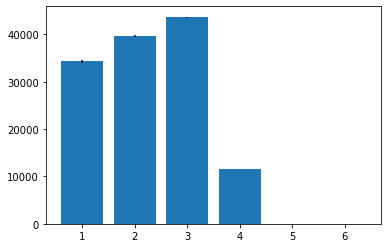

In [25]:
a = []
b = []
for elem in overall_results[1].values():
    a.append(np.mean(elem))
    b.append(np.std(elem))
plt.bar(range(1,7), a, yerr=b)

### ER

In [26]:
save_path = Path("data/models/shuffled/shuffled.flag")
save_path.parent.mkdir(exist_ok=True, parents=True)
flag_path, pkl_path, count_path =save_count_graph_from_matrix(save_path, shuffled_matrix)

100%|██████████| 31346/31346 [00:00<00:00, 3188191.79it/s]
7803528it [00:11, 668801.80it/s]


In [27]:
pool = mp.Pool()

In [28]:
complex_file = h5py.File(count_path, 'r')
matrix = load_sparse_matrix_from_pkl(pkl_path)
bid_matrix = matrix.multiply(matrix.T)
arrays, links = prepare_shared_memory(matrix, "full")
bid_arrays, bid_links = prepare_shared_memory(bid_matrix, "bid")
for _ in range(10):
    result_dictionary = {}
    aux_dictionary = {}
######## iteration #####
    for dimension in tqdm(range(1, 7)):
        try:
            ####### step 1: compiling the dictionary ######
            random_selection = np.random.choice(complex_file["Cells_" + str(dimension)].shape[0],
                                                min(10000,complex_file["Cells_" + str(dimension)].shape[0]),
                                                replace = False)
            random_selection.sort()
            simplex_iterator = iter(complex_file["Cells_" + str(dimension)][random_selection])
            ###### step 2: getting bidirectional targets ######
             # fictitious product to satisfy imap reqs of a single arugment.
            mp_iterator = product(simplex_iterator, [arrays], [bid_arrays])
            results = pool.imap(get_n_extended_simplices, mp_iterator)
            ###### step 3: counting extended simplices ######
            for elem in results:
                result_dictionary[dimension] = result_dictionary.get(dimension, 0) + elem[0]
        except KeyError: # If there are no simplices in h5 file..
                result_dictionary[dimension] = 0
        try:
            aux_dictionary[dimension] = len(complex_file["Cells_" + str(dimension)])
        except KeyError: # If there are no simplices in h5 file...
            aux_dictionary[dimension] = 0
        
        overall_results[2][dimension] = overall_results[2].get(dimension, []) + [result_dictionary[dimension]]
    print("Extended simplices for 10000 simplices per dimension")
    print(result_dictionary)
    print("Total simplices per dimension")
    print(aux_dictionary)
    # free shared memory
for link in links:
    link.unlink()
for link in bid_links:
    link.unlink()

  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 19517, 2: 19881, 3: 19764, 4: 76, 5: 0, 6: 0}
Total simplices per dimension
{1: 7803528, 2: 15429992, 3: 241650, 4: 38, 5: 0, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 19596, 2: 19573, 3: 19714, 4: 76, 5: 0, 6: 0}
Total simplices per dimension
{1: 7803528, 2: 15429992, 3: 241650, 4: 38, 5: 0, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 19765, 2: 19787, 3: 19719, 4: 76, 5: 0, 6: 0}
Total simplices per dimension
{1: 7803528, 2: 15429992, 3: 241650, 4: 38, 5: 0, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 19758, 2: 19562, 3: 19450, 4: 76, 5: 0, 6: 0}
Total simplices per dimension
{1: 7803528, 2: 15429992, 3: 241650, 4: 38, 5: 0, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 19672, 2: 19481, 3: 19635, 4: 76, 5: 0, 6: 0}
Total simplices per dimension
{1: 7803528, 2: 15429992, 3: 241650, 4: 38, 5: 0, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 19588, 2: 19787, 3: 19786, 4: 76, 5: 0, 6: 0}
Total simplices per dimension
{1: 7803528, 2: 15429992, 3: 241650, 4: 38, 5: 0, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 19339, 2: 19770, 3: 19599, 4: 76, 5: 0, 6: 0}
Total simplices per dimension
{1: 7803528, 2: 15429992, 3: 241650, 4: 38, 5: 0, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 19493, 2: 19779, 3: 20013, 4: 76, 5: 0, 6: 0}
Total simplices per dimension
{1: 7803528, 2: 15429992, 3: 241650, 4: 38, 5: 0, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 19567, 2: 19578, 3: 19555, 4: 76, 5: 0, 6: 0}
Total simplices per dimension
{1: 7803528, 2: 15429992, 3: 241650, 4: 38, 5: 0, 6: 0}


100%|██████████| 6/6 [00:48<00:00,  8.13s/it]

Extended simplices for 10000 simplices per dimension
{1: 19517, 2: 19843, 3: 19601, 4: 76, 5: 0, 6: 0}
Total simplices per dimension
{1: 7803528, 2: 15429992, 3: 241650, 4: 38, 5: 0, 6: 0}


<BarContainer object of 6 artists>

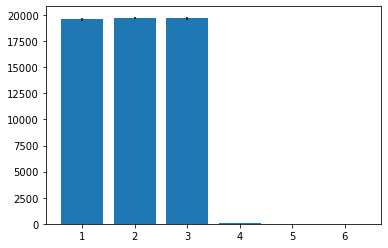

In [29]:
a = []
b = []
for elem in overall_results[2].values():
    a.append(np.mean(elem))
    b.append(np.std(elem))
plt.bar(range(1,7), a, yerr=b)

### ER bid adjusted

In [30]:
save_path = Path("data/models/adjusted/adjusted.flag")
save_path.parent.mkdir(exist_ok=True, parents=True)
flag_path, pkl_path, count_path =save_count_graph_from_matrix(save_path, bid_adjusted_matrix)

100%|██████████| 31346/31346 [00:00<00:00, 3217843.58it/s]
7803528it [00:11, 672091.35it/s]


In [31]:
pool = mp.Pool()

In [32]:
complex_file = h5py.File(count_path, 'r')
matrix = load_sparse_matrix_from_pkl(pkl_path)
bid_matrix = matrix.multiply(matrix.T)
arrays, links = prepare_shared_memory(matrix, "full")
bid_arrays, bid_links = prepare_shared_memory(bid_matrix, "bid")
for _ in range(10):
    result_dictionary = {}
    aux_dictionary = {}
######## iteration #####
    for dimension in tqdm(range(1, 7)):
        try:
            ####### step 1: compiling the dictionary ######
            random_selection = np.random.choice(complex_file["Cells_" + str(dimension)].shape[0],
                                                min(10000,complex_file["Cells_" + str(dimension)].shape[0]),
                                                replace = False)
            random_selection.sort()
            simplex_iterator = iter(complex_file["Cells_" + str(dimension)][random_selection])
            ###### step 2: getting bidirectional targets ######
             # fictitious product to satisfy imap reqs of a single arugment.
            mp_iterator = product(simplex_iterator, [arrays], [bid_arrays])
            results = pool.imap(get_n_extended_simplices, mp_iterator)
            ###### step 3: counting extended simplices ######
            for elem in results:
                result_dictionary[dimension] = result_dictionary.get(dimension, 0) + elem[0]
        except KeyError: # If there are no simplices in h5 file..
                result_dictionary[dimension] = 0
        try:
            aux_dictionary[dimension] = len(complex_file["Cells_" + str(dimension)])
        except KeyError: # If there are no simplices in h5 file...
            aux_dictionary[dimension] = 0
        
        overall_results[3][dimension] = overall_results[3].get(dimension, []) + [result_dictionary[dimension]]
    print("Extended simplices for 10000 simplices per dimension")
    print(result_dictionary)
    print("Total simplices per dimension")
    print(aux_dictionary)
    # free shared memory
for link in links:
    link.unlink()
for link in bid_links:
    link.unlink()

  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 60569, 2: 60345, 3: 60348, 4: 209, 5: 0, 6: 0}
Total simplices per dimension
{1: 7803528, 2: 15428770, 3: 241634, 4: 37, 5: 0, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 59748, 2: 60204, 3: 60344, 4: 209, 5: 0, 6: 0}
Total simplices per dimension
{1: 7803528, 2: 15428770, 3: 241634, 4: 37, 5: 0, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 60350, 2: 60348, 3: 60589, 4: 209, 5: 0, 6: 0}
Total simplices per dimension
{1: 7803528, 2: 15428770, 3: 241634, 4: 37, 5: 0, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 60093, 2: 60132, 3: 60102, 4: 209, 5: 0, 6: 0}
Total simplices per dimension
{1: 7803528, 2: 15428770, 3: 241634, 4: 37, 5: 0, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 60366, 2: 59930, 3: 60293, 4: 209, 5: 0, 6: 0}
Total simplices per dimension
{1: 7803528, 2: 15428770, 3: 241634, 4: 37, 5: 0, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 60364, 2: 60708, 3: 60516, 4: 209, 5: 0, 6: 0}
Total simplices per dimension
{1: 7803528, 2: 15428770, 3: 241634, 4: 37, 5: 0, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 60642, 2: 60673, 3: 60193, 4: 209, 5: 0, 6: 0}
Total simplices per dimension
{1: 7803528, 2: 15428770, 3: 241634, 4: 37, 5: 0, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 60844, 2: 60276, 3: 60230, 4: 209, 5: 0, 6: 0}
Total simplices per dimension
{1: 7803528, 2: 15428770, 3: 241634, 4: 37, 5: 0, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 59948, 2: 60273, 3: 60141, 4: 209, 5: 0, 6: 0}
Total simplices per dimension
{1: 7803528, 2: 15428770, 3: 241634, 4: 37, 5: 0, 6: 0}


100%|██████████| 6/6 [00:49<00:00,  8.27s/it]

Extended simplices for 10000 simplices per dimension
{1: 60418, 2: 60305, 3: 60058, 4: 209, 5: 0, 6: 0}
Total simplices per dimension
{1: 7803528, 2: 15428770, 3: 241634, 4: 37, 5: 0, 6: 0}


<BarContainer object of 6 artists>

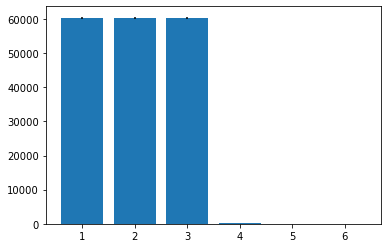

In [33]:
a = []
b = []
for elem in overall_results[3].values():
    a.append(np.mean(elem))
    b.append(np.std(elem))
plt.bar(range(1,7), a, yerr=b)

Text(0, 0.5, 'Extended simplices / simplex')

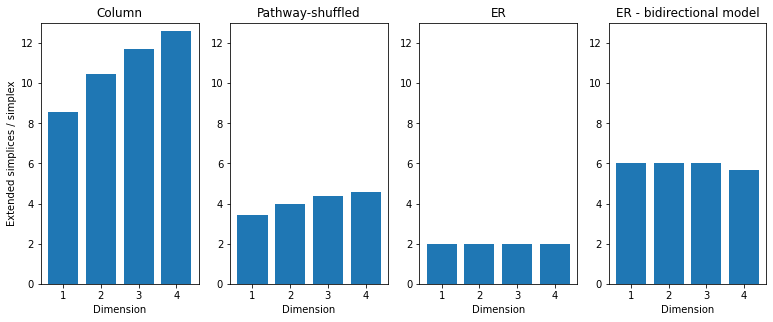

In [36]:
img, axes = plt.subplots(1,4,figsize = [13, 4.8])
titles = ["Column", "Pathway-shuffled", "ER", "ER - bidirectional model"]
s_d4 = [6599529, 2520, 38, 37]
for ax, dicts, title, s in zip(axes, overall_results, titles, s_d4):
    a = []
    for elem in dicts.values():
        a.append(np.mean(elem)/10000)
    a[3] = a[3]*10000/min(10000, s)
    ax.bar(range(1,5), a[:4])
    ax.set_xlabel("Dimension")
    ax.set_ylim(0,13)
    ax.set_title(title)
axes[0].set_ylabel("Extended simplices / simplex")


In [37]:
img.savefig(fname = "Comparison extended simplices 2", transparent=False, facecolor = "white")
      